<a href="https://colab.research.google.com/github/SzymonKaminski1/its_a_bird_its_a_plane/blob/main/it's_a_bird_it's_a_plane_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's a bird! It's a plane!
This project is about building convolutional neural network to classify birds and planes photos. It consists of data augmentation, building and training CNN, plotting and basic testing of model's performance.

Importing necessary libraries and data from my Google Disk

In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import imghdr
import cv2
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt


In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
main_folder = "/content/drive/MyDrive/bird_plane_images"
train_dir = "/content/drive/MyDrive/bird_plane_images/train"
test_dir = "/content/drive/MyDrive/bird_plane_images/test"

In [6]:
#check if it is loaded correctly
os.listdir(train_dir)

['train_birds', 'train_airplanes']

Loading data by tensorflow

In [7]:
data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 14602 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
batch[1]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

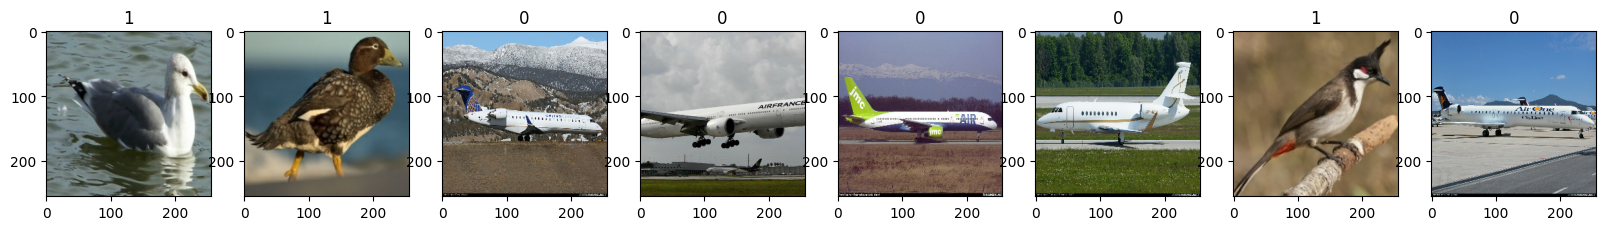

In [11]:
#check if images loaded correctly
fig, ax = plt.subplots(ncols = 8, figsize = (20, 20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data augmentation using ImageDataGenerator.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_data_gen = ImageDataGenerator(rescale=1./223, rotation_range=15, width_shift_range=0.2,
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    horizontal_flip = True, fill_mode = 'constant', cval = 125,
                                    validation_split = 0.2)

In [14]:
val_data_gen = ImageDataGenerator(rescale = 1./223)

In [15]:
test_data_gen = ImageDataGenerator(rescale = 1./223)

In [16]:
train_gen = train_data_gen.flow_from_directory(train_dir, batch_size=128, target_size=(224,224), class_mode = 'binary', subset='training')

Found 11682 images belonging to 2 classes.


In [17]:
val_gen = train_data_gen.flow_from_directory(train_dir, batch_size=128, target_size=(224,224), class_mode = 'binary', subset='validation')

Found 2920 images belonging to 2 classes.


In [18]:
test_gen = test_data_gen.flow_from_directory(test_dir, batch_size=128, target_size=(224,224), class_mode = 'binary', shuffle=False)


Found 3856 images belonging to 2 classes.


Creating our CNN. This particular architecture is a result of a long process of testing different values of features. I described this process in a Read.me.

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(224, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Training our CNN.

In [26]:
hist = model.fit(train_gen, epochs=10, validation_data=val_gen, callbacks=[tensorboard_callback])

Epoch 1/10
92/92 [==============================] - 3109s 34s/step - loss: 0.4507 - accuracy: 0.7859 - val_loss: 0.4088 - val_accuracy: 0.8452
Epoch 2/10
92/92 [==============================] - 2792s 30s/step - loss: 0.1938 - accuracy: 0.9253 - val_loss: 0.4358 - val_accuracy: 0.8521
Epoch 3/10
92/92 [==============================] - 2727s 30s/step - loss: 0.1137 - accuracy: 0.9599 - val_loss: 0.3877 - val_accuracy: 0.8856
Epoch 4/10
92/92 [==============================] - 2786s 30s/step - loss: 0.0880 - accuracy: 0.9668 - val_loss: 0.3371 - val_accuracy: 0.8836
Epoch 5/10
92/92 [==============================] - 2728s 30s/step - loss: 0.0870 - accuracy: 0.9670 - val_loss: 0.2858 - val_accuracy: 0.9137
Epoch 6/10
92/92 [==============================] - 2775s 30s/step - loss: 0.0660 - accuracy: 0.9762 - val_loss: 0.2686 - val_accuracy: 0.9086
Epoch 7/10
92/92 [==============================] - 2742s 30s/step - loss: 0.0550 - accuracy: 0.9802 - val_loss: 0.2159 - val_accuracy: 0.9233

Saving our model.

In [27]:
model.save('/content/drive/MyDrive/bird_plane_images/model_conv_maxpool_layers_4_64_epochs_10_batch_128_resolution_224.h5')

Plotting training/validation accuracy and loss.

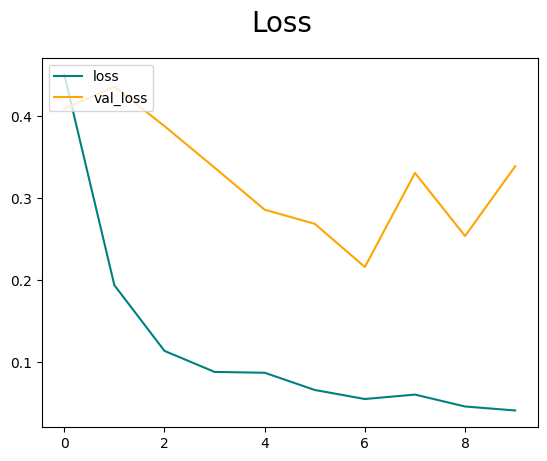

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

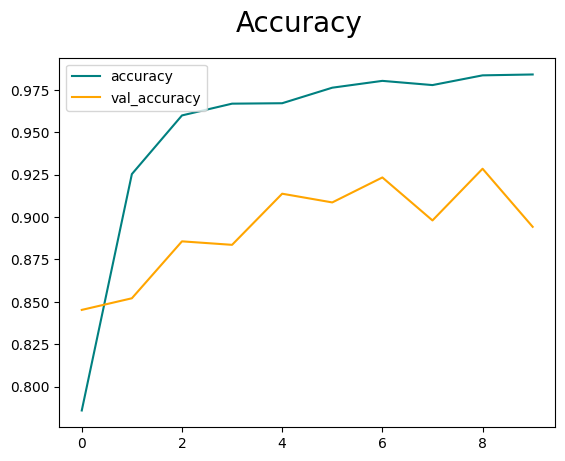

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Defying function to check accuracy for a single class.

In [30]:
def testing (direction, category):
  count = 0
  zeros = 0
  ones = 0
  for image_name in os.listdir(direction):
      count += 1
      img = cv2.imread(os.path.join(direction, image_name))
      resize = tf.image.resize(img, (224,224))
      if model.predict(np.expand_dims(resize/223, 0), verbose = 0) > 0.5:
        ones += 1
      else:
        zeros += 1
  if category == 1:
      accuracy = ones/count
  if category == 0:
      accuracy = zeros/count

  print('accuracy = ', accuracy)

In [31]:
bird_testset = "/content/drive/MyDrive/bird_plane_images/test/test_birds"
airplane_testset = "/content/drive/MyDrive/bird_plane_images/test/test_airplanes"

Checking accuracy.

In [32]:
testing(bird_testset, 1)

accuracy =  0.9361904761904762


In [33]:
testing(airplane_testset, 0)

accuracy =  0.9646924829157175


AUC vaule of our prediction.

In [34]:
y_pred = model.predict_generator(test_gen)

<ipython-input-34-506fad99303f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_gen)


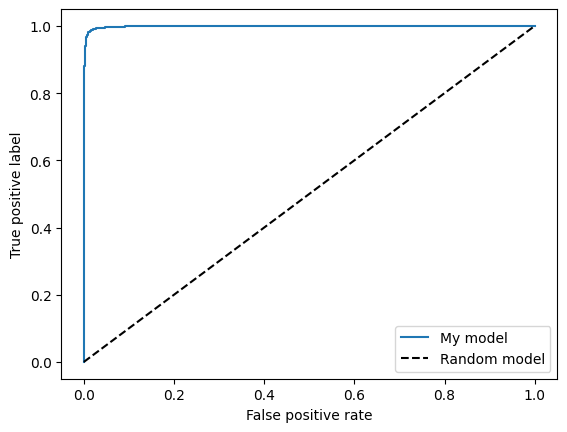

In [35]:
fpr, tpr, thresholds = roc_curve(test_gen.labels, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'My model')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlabel('False positive rate')
plt.ylabel('True positive label')
plt.legend()
plt.show()